# Reward term behaviors
Say you have a reward function that is a sum of several terms such as
$$r = r_1+...+r_n = \sum_i r_i$$
And assume there is a curriculum to subsequenctly introduce each term while learning that improves efficient.
How can we decide which term to add next in a curriculum without trying all combinations?

The goal of this notebook is to look at several measures that might be useful to decide a terms influence. In general, a term can either be helpful (such as a sparse goal-distance reward) or adversarial (such as constraints of taking minimal actions).
We expect that several measures differ depending on the characteristics or a reward term. Some of these measures are
- Policy entropy
- Episode lenghts
- Q-value loss
- Q-value entropy?

Through plotting these values we hope to find a more principled way to design a reward curriculum.

## Experiment 1
Given a single reward term, what are the above metrics after 5k random rollouts and training once for 5k samples??

## compare different reward setups

$$R_{base} = r_g + r_d + r_s+r_t+r_c+r_a$$
$$R_{dense} = r_d + r_s+r_t+r_a$$

All constraints in curriculum
$$R_1 = r_g + r_d + k(r_s+r_x+r_c+r_a)$$
Curriculum w/o speed
$$R_s = r_g + r_d + r_s + k(r_x+r_c+r_a)$$
Curriculum w/o acceleration
$$R_a = r_g + r_d + r_a + k(r_s+r_x+r_c)$$
Curriculum w/o collision
$$R_c = r_g + r_d + r_c + k(r_s+r_x+r_a)$$
Curriculum w/o cross-track error
$$R_x = r_g + r_d + r_x + k(r_s+r_c+r_a)$$

<!-- 
Potentially interesting is basic setup of
Curriculum w/o speed
$$R_1 = r_g + r_d + k r_s$$
Curriculum w/o acceleration
$$R_2 = r_g + r_d + k r_a$$
Curriculum w/o collision
$$R_3 = r_g + r_d + k r_c$$
Curriculum w/o cross-track error
$$R_4 = r_g + r_d + k r_t$$

> test completely removing both g and c -->

In [233]:
# r1_runs = [
#     "umk9vn68",
#     "cak6i0i5",
#     "firrm5zl",
# ]
rbase_runs = [
    "arxxcn93",
    "xsepfxha",
    "3qs9858a"
]
r1_runs = [
    "bbcjqat3",
    "cmqag0a0",
    "420sm2f5",
]
# rs_runs = [
#     "7zxwnf9d",
#     "lz3yjdya",
#     "s4xz6ufe",
# ]
rs_runs = [
    "p9pm01ua",
    "xvp1lpmx",
    "xt3ej5s5",
]
rc_runs = [
    "t2guxot9",
    "3heb3ll0",
    "rfztpvth"
]
ra_runs = [
    "x4mm79uc",
    "7jsaap2g",
    "oeb5sqnw"
]
rx_runs = [
    "awwcqqdj",
    "fnp1sssl",
    "z01m3i6u"
]
rdense_runs = [
    "nv56fbbz",
    "o71unjm6",
    "zfftsrdm"
]

all_runs = [rbase_runs, r1_runs, rs_runs, rc_runs, ra_runs, rx_runs, rdense_runs]

In [176]:
import pandas as pd
import wandb
import numpy as np

api = wandb.Api()
project = "kilian/DRL-Traj-Planner"

def extract_data(run_ids, num_samples=50_000):
    episode_success = []
    episode_lengths = []
    episode_rewards = []
    entropies = []
    losses_qvalue = []
    kl_losses = []

    for run_id in run_ids:
        run = api.run(f'{project}/{run_id}')
        run_data = run.history(samples=num_samples)
        success_rate = run_data['train/episode_success']
        success_rate = [rate for rate in success_rate if not np.isnan(rate)]

        episode_length = run_data['train/episode_length']
        episode_length = [length for length in episode_length if not np.isnan(length)]

        episode_reward = run_data['train/full_reward']
        # episode_reward = run_data['train/episode_reward']
        episode_reward = [reward for reward in episode_reward if not np.isnan(reward)]

        # also get train/entropy train/loss_qvalue, train/kl_loss, train/full_reward
        entropy = run_data['train/entropy']
        entropy = [e for e in entropy if not np.isnan(e)]
        entropy = [0.0] * 4 + entropy

        loss_qvalue = run_data['train/loss_qvalue']
        loss_qvalue = [e for e in loss_qvalue if not np.isnan(e)]

        if 'train/kl_loss' not in run_data:
            kl_loss = [0.0] * 25
        else:
            kl_loss = run_data['train/kl_loss']
            kl_loss = [e for e in kl_loss if not np.isnan(e)]

        episode_success.append(np.array(success_rate))
        episode_lengths.append(np.array(episode_length))
        episode_rewards.append(np.array(episode_reward))
        entropies.append(np.array(entropy))
        losses_qvalue.append(np.array(loss_qvalue))
        kl_losses.append(np.array(kl_loss))

    return episode_success, episode_lengths, episode_rewards, entropies, losses_qvalue, kl_losses

In [177]:
all_data = []
for i, runs in enumerate(all_runs):
    print(i)
    data = extract_data(runs)
    data = [np.stack(d, axis=0) for d in data]
    all_data.append(data)

0
1
2
3
4
5
6


In [178]:
for i in range(len(all_data)):
    all_data[i][4] = np.pad(all_data[i][4], [(0, 0), (4,0)])
    all_data[i][5] = np.pad(all_data[i][5], [(0, 0), (25,0)])

In [185]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [227]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

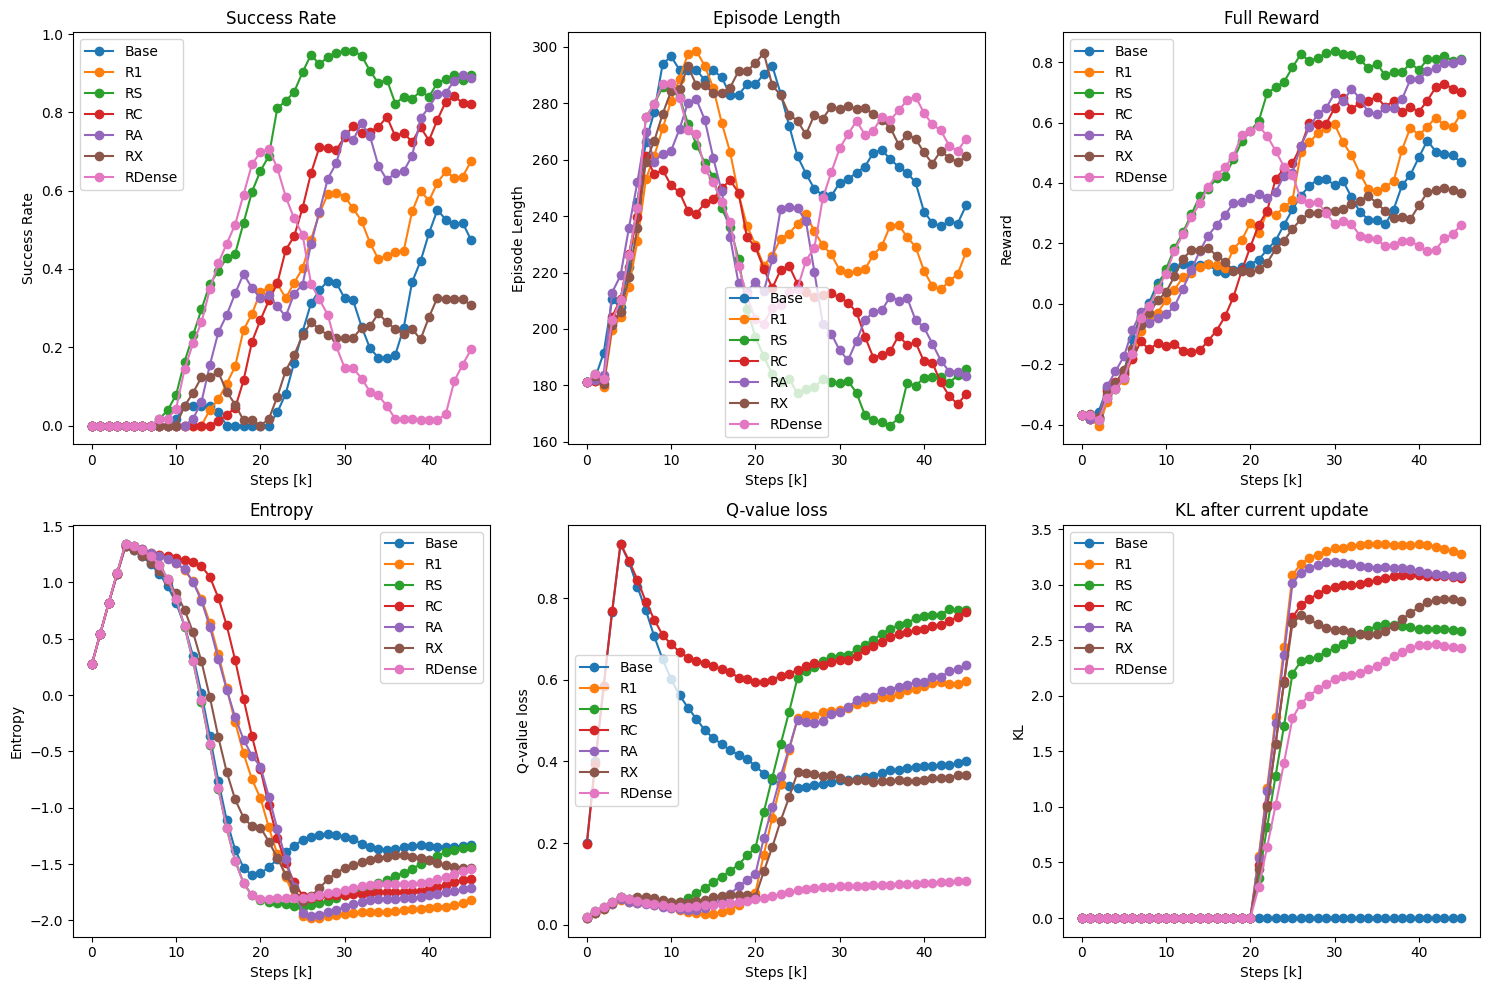

In [228]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# plt.style.use('Solarize_Light2')

labels = ['Base', 'R1', 'RS', 'RC', 'RA', 'RX', 'RDense']
N = 5

smoothing = True

# Plot success data
for l, d in zip(labels, all_data):
    if smoothing:
        x = np.convolve(d[0].mean(0), np.ones(N)/N, mode='valid')
        axs[0,0].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[0,0].plot(np.arange(50), d[0].mean(0), marker='o', label=l)

    # axs[0,0].fill_between(np.arange(50), d[0].mean(0) - d[0].std(0), d[0].mean(0) + d[0].std(0), alpha=0.2)
    axs[0,0].set_xlabel('Steps [k]')
    axs[0,0].set_ylabel('Success Rate')
    axs[0,0].set_title('Success Rate')
    axs[0,0].legend()

    # Plot length data
    if smoothing:
        x = np.convolve(d[1].mean(0), np.ones(N)/N, mode='valid')
        axs[0,1].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[0,1].plot(np.arange(50), d[1].mean(0), marker='o', label=l)
    # axs[0,1].fill_between(np.arange(50), d[1].mean(0) - d[1].std(0), d[1].mean(0) + d[1].std(0), alpha=0.2)
    axs[0,1].set_xlabel('Steps [k]')
    axs[0,1].set_ylabel('Episode Length')
    axs[0,1].set_title('Episode Length')
    axs[0,1].legend()

    # Plot reward data
    if smoothing:
        x = np.convolve(d[2].mean(0), np.ones(N)/N, mode='valid')
        axs[0,2].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[0,2].plot(np.arange(50), d[2].mean(0), marker='o', label=l)
    # axs[0,2].fill_between(np.arange(50), d[2].mean(0) - d[2].std(0), d[2].mean(0) + d[2].std(0), alpha=0.2)
    axs[0,2].set_xlabel('Steps [k]')
    axs[0,2].set_ylabel('Reward')
    axs[0,2].set_title('Full Reward')
    axs[0,2].legend()

    # entropy
    if smoothing:
        x = np.convolve(d[3].mean(0), np.ones(N)/N, mode='valid')
        axs[1,0].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[1,0].plot(np.arange(50), d[3].mean(0), marker='o', label=l)
    # axs[1,0].fill_between(np.arange(50), d[3].mean(0) - d[3].std(0), d[3].mean(0) + d[3].std(0), alpha=0.2)
    axs[1,0].set_xlabel('Steps [k]')
    axs[1,0].set_ylabel('Entropy')
    axs[1,0].set_title('Entropy')
    axs[1,0].legend()

    # Plot length data
    if smoothing:
        x = np.convolve(d[4].mean(0), np.ones(N)/N, mode='valid')
        axs[1,1].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[1,1].plot(np.arange(50), d[4].mean(0), marker='o', label=l)
    # axs[1,1].fill_between(np.arange(50), d[4].mean(0) - d[4].std(0), d[4].mean(0) + d[4].std(0), alpha=0.2)
    axs[1,1].set_xlabel('Steps [k]')
    axs[1,1].set_ylabel('Q-value loss')
    axs[1,1].set_title('Q-value loss')
    axs[1,1].legend()

    # Plot reward data
    if smoothing:
        x = np.convolve(d[5].mean(0), np.ones(N)/N, mode='valid')
        axs[1,2].plot(np.arange(x.shape[0]), x, marker='o', label=l)
    else:
        axs[1,2].plot(np.arange(50), d[5].mean(0), marker='o', label=l)
    # axs[1,2].fill_between(np.arange(50), d[5].mean(0) - d[5].std(0), d[5].mean(0) + d[5].std(0), alpha=0.2)
    axs[1,2].set_xlabel('Steps [k]')
    axs[1,2].set_ylabel('KL')
    axs[1,2].set_title('KL after current update')
    axs[1,2].legend()


plt.tight_layout()
plt.show()

In [240]:
def extract_eval_data(run_ids):
    data = []
    episode_lengths = []
    episode_rewards = []
    entropies = []

    for run_id in run_ids:
        run = api.run(f'{project}/{run_id}')
        summary = run.summary
        success_rate = summary.get('eval/episode_success')
        episode_length = summary.get('eval/episode_length')
        episode_reward = summary.get('eval/full_reward')
        entropy = summary.get('eval/entropy')
        data.append(success_rate)
        episode_lengths.append(episode_length)
        episode_rewards.append(episode_reward)
        entropies.append(entropy)

    return data, episode_lengths, episode_rewards, entropies

In [241]:
all_data = []
for i, runs in enumerate(all_runs):
    eval_data = extract_eval_data(runs)
    all_data.append(eval_data)

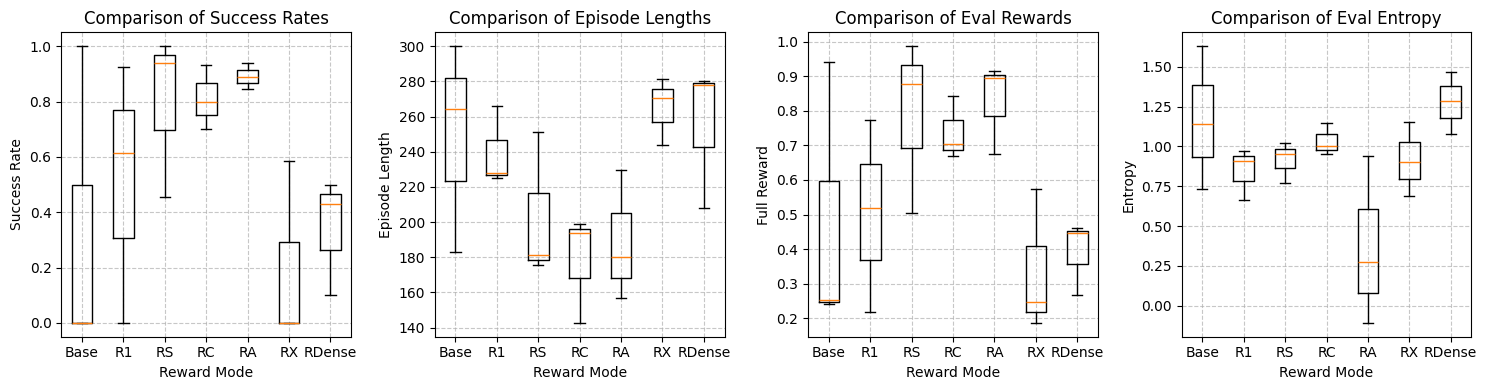

In [245]:
# labels = ['Sum', 'Curriculum', 'Curriculum More Iter']
data = [ad[0] for ad in all_data]
episode_lengths = [ad[1] for ad in all_data]
episode_rewards = [ad[2] for ad in all_data]
entropies = [ad[3] for ad in all_data]

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].boxplot(data, tick_labels=labels)
axs[0].set_xlabel('Reward Mode')
axs[0].set_ylabel('Success Rate')
axs[0].set_title('Comparison of Success Rates')
axs[0].grid(True, linestyle='--', alpha=0.7)

axs[1].boxplot(episode_lengths, tick_labels=labels)
axs[1].set_xlabel('Reward Mode')
axs[1].set_ylabel('Episode Length')
axs[1].set_title('Comparison of Episode Lengths')
axs[1].grid(True, linestyle='--', alpha=0.7)

axs[2].boxplot(episode_rewards, tick_labels=labels)
axs[2].set_xlabel('Reward Mode')
axs[2].set_ylabel('Full Reward')
axs[2].set_title('Comparison of Eval Rewards')
axs[2].grid(True, linestyle='--', alpha=0.7)

axs[3].boxplot(entropies, tick_labels=labels)
axs[3].set_xlabel('Reward Mode')
axs[3].set_ylabel('Entropy')
axs[3].set_title('Comparison of Eval Entropy')
axs[3].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Change in policy per reward term

In [2]:
from configs import BaseConfig
from pkg_ddpg_td3.utils.map import generate_map_corridor
from pkg_torchrl.env import make_env
from pkg_torchrl.sac import SAC

/opt/homebrew/anaconda3/envs/rlboost/lib/python3.11/site-packages/torchrl/data/replay_buffers/samplers.py:37: UserWarning: Failed to import torchrl C++ binaries. Some modules (eg, prioritized replay buffers) may not work with your installation. If you installed TorchRL from PyPI, please report the bug on TorchRL github. If you installed TorchRL locally and/or in development mode, check that you have all the required compiling packages.
  warnings.warn(EXTENSION_WARNING)


In [125]:
# TODO save a policy and then rollout for different terms
config = BaseConfig()

generate_map = generate_map_corridor
train_env = make_env(config, generate_map=generate_map)
eval_env = make_env(config, generate_map=generate_map)

sac_base = SAC(config.sac, train_env, eval_env)

model_path = "../Model/testing/24_09_18_08_53_58_SAC/final_model.pth"
sac_base.load(model_path)

Reward mode: curriculum_step
Reward mode: curriculum_step


/opt/homebrew/anaconda3/envs/rlboost/lib/python3.11/site-packages/extremitypathfinder/extremitypathfinder.py:178: UserWarning: called .prepare() on already prepared map. skipping...
  warnings.warn(
/opt/homebrew/anaconda3/envs/rlboost/lib/python3.11/site-packages/extremitypathfinder/extremitypathfinder.py:178: UserWarning: called .prepare() on already prepared map. skipping...
  warnings.warn(
/Users/tamino/dev/robot_learning/DRL-Traj-Planner/src/pkg_torchrl/base.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will n

In [126]:
import copy
from tqdm import tqdm
import torch
import torch.nn as nn
from tensordict import TensorDict
from torchrl.envs.utils import ExplorationType, set_exploration_type

from pkg_torchrl.utils import make_replay_buffer

target_actor = copy.deepcopy(sac_base.model.policy)
train_env.unwrapped.set_curriculum_stage(1)

Setting curriculum stage to 1


In [127]:
def train(algo, rb, num_updates = 1000):
    losses = TensorDict({}, batch_size=[num_updates])
    for i in tqdm(range(num_updates)):
        sampled_tensordict = rb.sample()
        sampled_tensordict = sampled_tensordict.clone()

        loss_td = algo.loss_module(sampled_tensordict)

        # calculate kl
        with set_exploration_type(ExplorationType.MODE), torch.no_grad():
            log_prior = target_actor.log_prob(sampled_tensordict)
        log_post = algo.model.policy.log_prob(sampled_tensordict)
        if config.sac.kl_approx_method == "logp":
            kl_loss = (log_post - log_prior).mean()
        elif config.sac.kl_approx_method == "abs":
            kl_loss = 0.5 * nn.SmoothL1Loss()(log_post, log_prior)
        loss_td['kl_loss'] = kl_loss

        loss_keys = ["loss_actor", "loss_qvalue", "loss_alpha"]
        optim_keys = ["actor", "critic", "alpha"]

        for l_key, o_key in zip(loss_keys, optim_keys):
            loss = loss_td[l_key]

            optim = algo.optim[o_key]
            loss.backward(retain_graph=True)
            params = optim.param_groups[0]["params"]
            torch.nn.utils.clip_grad_norm_(params, algo.config.max_grad_norm)
            optim.step()
            optim.zero_grad()

        losses[i] = loss_td.detach()
    return losses

In [161]:
from collections import defaultdict

# ["x", "c", "a", "s"]
reward_configs = [["x"], ["c"], ["a"], ["s"]]

term_losses = defaultdict(list)
eval_list = defaultdict(list)
samples_per_round = 1000
num_updates = 100

for reward_config in reward_configs:
        print(reward_config)

        for _ in range(4):
            sac_ft = copy.deepcopy(sac_base)
            train_env.unwrapped.config.sac.curriculum.constraint_reward_keys = reward_config

            replay_buffer = make_replay_buffer(
                batch_size=config.sac.batch_size,
                prioritize=config.sac.prioritize,
                buffer_size=config.sac.replay_buffer_size,
                scratch_dir=config.sac.scratch_dir,
                device="cpu",
                prefetch=config.sac.prefetch,
            )

            data = train_env.rollout(samples_per_round, target_actor, break_when_any_done=False)#, render=True)
            replay_buffer.extend(data)

            losses = train(sac_ft, replay_buffer, num_updates=num_updates)
            term_losses[reward_config[0]].append(losses)
    
            with set_exploration_type(ExplorationType.MODE):
                eval_data = eval_env.rollout(3_000, target_actor, break_when_any_done=False)
            eval_list[reward_config[0]].append(eval_data)

['x']


/opt/homebrew/anaconda3/envs/rlboost/lib/python3.11/site-packages/extremitypathfinder/extremitypathfinder.py:178: UserWarning: called .prepare() on already prepared map. skipping...
  warnings.warn(
100%|██████████| 100/100 [00:09<00:00, 10.97it/s]


['c']


100%|██████████| 100/100 [00:08<00:00, 11.26it/s]


['a']


100%|██████████| 100/100 [00:08<00:00, 11.16it/s]


['s']


100%|██████████| 100/100 [00:09<00:00, 11.09it/s]


In [162]:
t_losses = copy.deepcopy(term_losses)
for key in t_losses:
    t_losses[key] = torch.cat(t_losses[key], dim=0)

e_list = eval_list
for key in e_list:
    e_list[key] = torch.cat(e_list[key], dim=0)

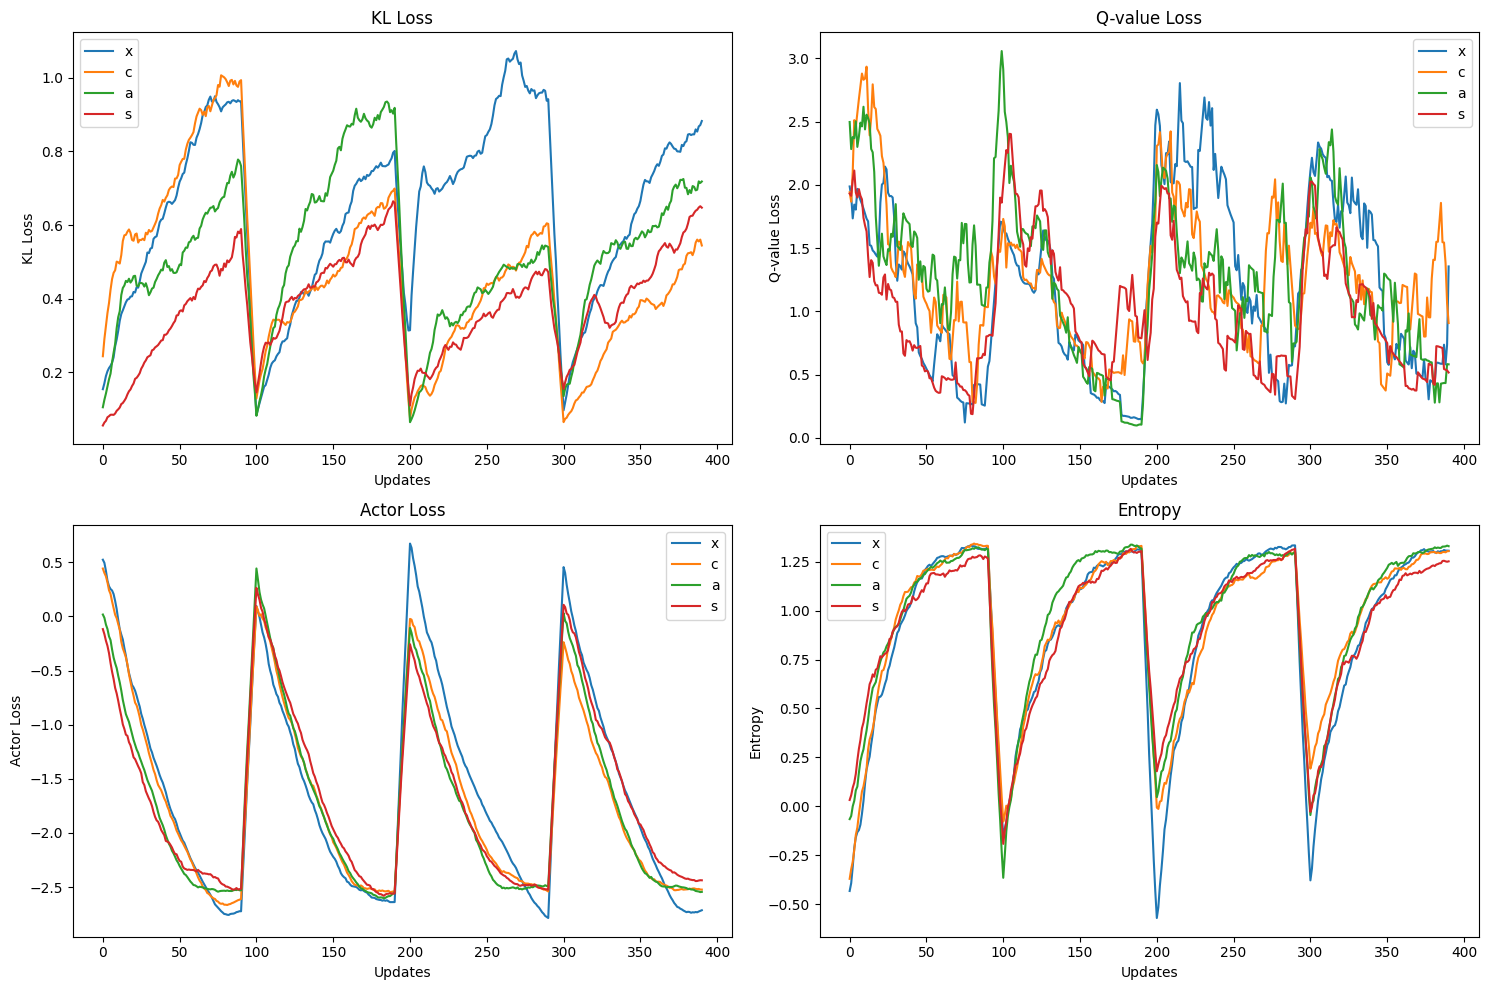

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

N = 10  # Smoothing window size

# Function to smooth the data
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot KL Loss
for l, losses in t_losses.items():
    smoothed_kl_loss = smooth(losses['kl_loss'].cpu().numpy(), N)
    axs[0, 0].plot(smoothed_kl_loss, label=l)
axs[0, 0].set_title('KL Loss')
axs[0, 0].set_xlabel('Updates')
axs[0, 0].set_ylabel('KL Loss')
axs[0, 0].legend()

# Plot Q-value Loss
for l, losses in t_losses.items():
    smoothed_qvalue_loss = smooth(losses['loss_qvalue'].cpu().numpy(), N)
    axs[0, 1].plot(smoothed_qvalue_loss, label=l)
axs[0, 1].set_title('Q-value Loss')
axs[0, 1].set_xlabel('Updates')
axs[0, 1].set_ylabel('Q-value Loss')
axs[0, 1].legend()

# Plot Actor Loss
for l, losses in t_losses.items():
    smoothed_actor_loss = smooth(losses['loss_actor'].cpu().numpy(), N)
    axs[1, 0].plot(smoothed_actor_loss, label=l)
axs[1, 0].set_title('Actor Loss')
axs[1, 0].set_xlabel('Updates')
axs[1, 0].set_ylabel('Actor Loss')
axs[1, 0].legend()

# Plot Entropy
for l, losses in t_losses.items():
    smoothed_entropy = smooth(losses['entropy'].cpu().numpy(), N)
    axs[1, 1].plot(smoothed_entropy, label=l)
axs[1, 1].set_title('Entropy')
axs[1, 1].set_xlabel('Updates')
axs[1, 1].set_ylabel('Entropy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

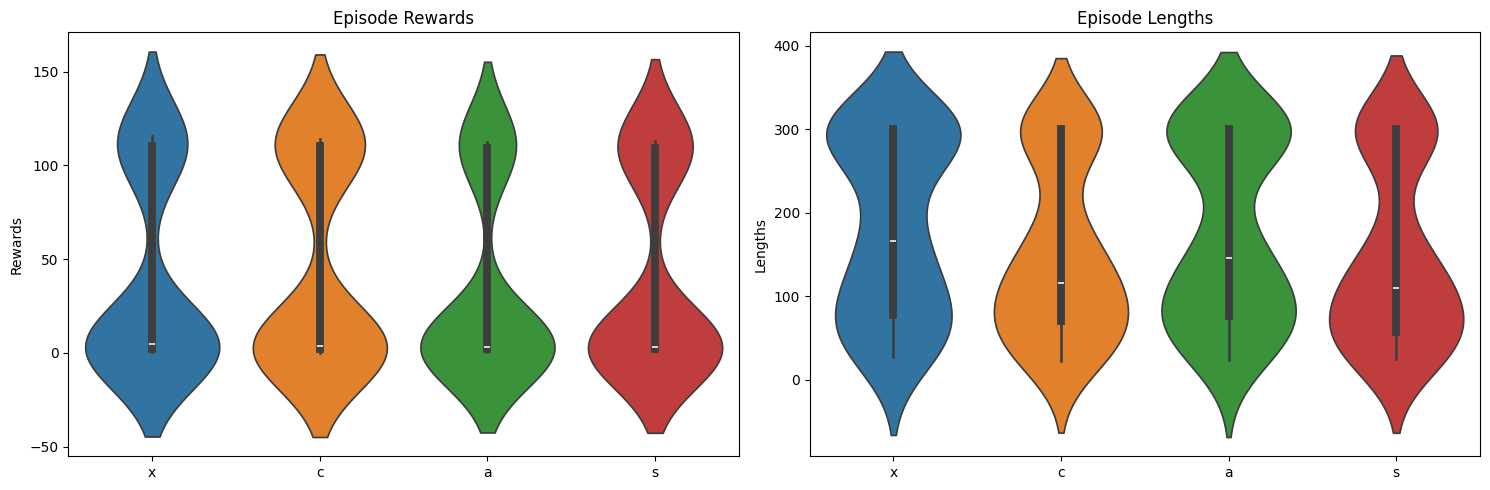

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Collect all episode rewards and lengths
all_episode_rewards = []
all_episode_lengths = []
all_episode_success = []
labels = []

for key, eval_rollout in e_list.items():
    eval_episode_end = eval_rollout["next", "done"]
    eval_episode_rewards = eval_rollout["next", "episode_reward"][eval_episode_end]
    eval_episode_lengths = eval_rollout["next", "step_count"][eval_episode_end]
    eval_episode_success = (eval_episode_rewards > 101.0).float()
    
    all_episode_rewards.append(eval_episode_rewards.cpu().numpy())
    all_episode_lengths.append(eval_episode_lengths.cpu().numpy())
    all_episode_success.append(eval_episode_success.cpu().numpy())
    labels.append(key)

# Plot episode rewards
sns.violinplot(data=all_episode_rewards, ax=axs[0])
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels)
axs[0].set_title('Episode Rewards')
axs[0].set_ylabel('Rewards')

# Plot episode lengths
sns.violinplot(data=all_episode_lengths, ax=axs[1])
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels)
axs[1].set_title('Episode Lengths')
axs[1].set_ylabel('Lengths')

# axs[2].boxplot(all_episode_success, labels=labels)
# axs[2].set_title('Episode Success')
# axs[2].set_ylabel('Lengths')

plt.tight_layout()
plt.show()

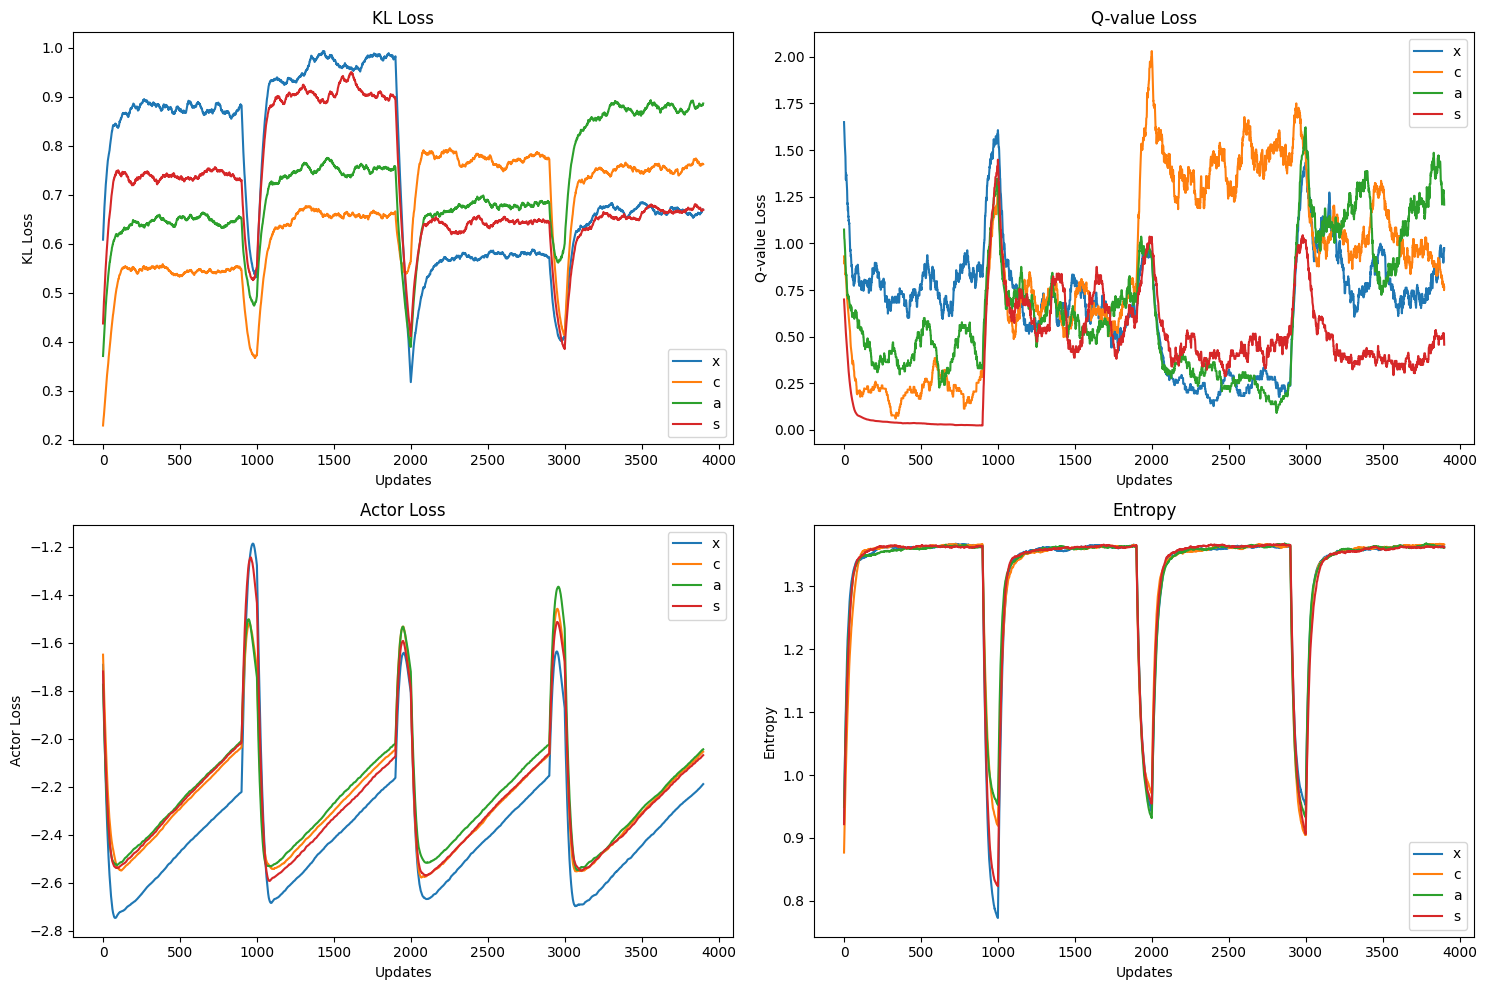

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

N = 100  # Smoothing window size

# Function to smooth the data
def smooth(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot KL Loss
for l, losses in t_losses.items():
    smoothed_kl_loss = smooth(losses['kl_loss'].cpu().numpy(), N)
    axs[0, 0].plot(smoothed_kl_loss, label=l)
axs[0, 0].set_title('KL Loss')
axs[0, 0].set_xlabel('Updates')
axs[0, 0].set_ylabel('KL Loss')
axs[0, 0].legend()

# Plot Q-value Loss
for l, losses in t_losses.items():
    smoothed_qvalue_loss = smooth(losses['loss_qvalue'].cpu().numpy(), N)
    axs[0, 1].plot(smoothed_qvalue_loss, label=l)
axs[0, 1].set_title('Q-value Loss')
axs[0, 1].set_xlabel('Updates')
axs[0, 1].set_ylabel('Q-value Loss')
axs[0, 1].legend()

# Plot Actor Loss
for l, losses in t_losses.items():
    smoothed_actor_loss = smooth(losses['loss_actor'].cpu().numpy(), N)
    axs[1, 0].plot(smoothed_actor_loss, label=l)
axs[1, 0].set_title('Actor Loss')
axs[1, 0].set_xlabel('Updates')
axs[1, 0].set_ylabel('Actor Loss')
axs[1, 0].legend()

# Plot Entropy
for l, losses in t_losses.items():
    smoothed_entropy = smooth(losses['entropy'].cpu().numpy(), N)
    axs[1, 1].plot(smoothed_entropy, label=l)
axs[1, 1].set_title('Entropy')
axs[1, 1].set_xlabel('Updates')
axs[1, 1].set_ylabel('Entropy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()